**python -m venv ./venv**

Run that in your terminal to set up the virtual environment, then run the below command. If you don't care about using a virtual environment, just run the below command to install the required packages for your current version of Python.

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


You can also run the following:

In [ ]:
%pip install -r requirements.txt

**Process 1: Data Cleaning**

In [23]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('./Raw Flight Price Prediction Data/Clean_Dataset.csv')

# Drop the first unnamed column if it's just an index
data = data.drop(data.columns[0], axis=1)

In [24]:
# Conversion rate from INR to USD
conversion_rate = 0.012

# Function to convert price from INR to USD
def convert_to_usd(price_inr):
    return price_inr * conversion_rate

# Create new column for USD price, applying conversion and round to the nearest cent
data['priceUSD'] = data['price'].apply(convert_to_usd).apply(lambda x: round(x, 2))

# Rename current price column to indicate it is in INR (Indian Rupee)
data = data.rename(columns={'price': 'priceINR'})

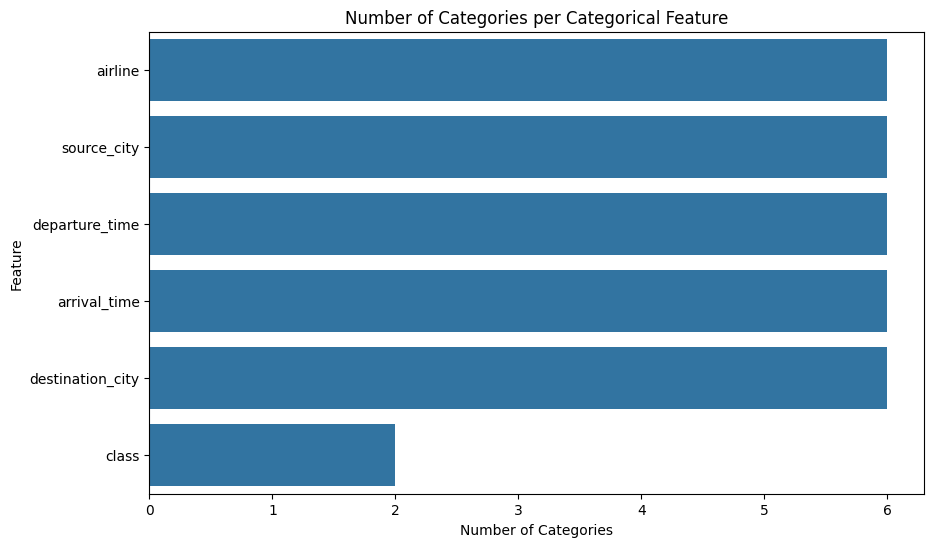

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of unique values in each categorical column
category_counts = {col: data[col].nunique() for col in categorical_columns}

# Bar plot of number of categories per feature
plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.values()), y=list(category_counts.keys()))
plt.xlabel('Number of Categories')
plt.ylabel('Feature')
plt.title('Number of Categories per Categorical Feature')
plt.show()

In [25]:
# Mapping dictionary
stops_mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}

# Convert string versions of numbers to numerical values
data['stops'] = data['stops'].map(stops_mapping)

In [39]:
# Perform One-Hot Encoding on categorical columns
categorical_columns = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the encoded dataframe to verify changes
print(data_encoded.iloc[:, :10].head())  # Adjust the slice as per your interest

    flight  stops  duration  days_left  priceINR  priceUSD  airline_AirAsia  \
0  SG-8709      0      2.17          1      5953     71.44            False   
1  SG-8157      0      2.33          1      5953     71.44            False   
2   I5-764      0      2.17          1      5956     71.47             True   
3   UK-995      0      2.25          1      5955     71.46            False   
4   UK-963      0      2.33          1      5955     71.46            False   

   airline_Air_India  airline_GO_FIRST  airline_Indigo  
0              False             False           False  
1              False             False           False  
2              False             False           False  
3              False             False           False  
4              False             False           False  


In [35]:
# To get a summary for all columns regardless of type, you can use include='all'
print(data_encoded.describe())

               stops       duration      days_left       priceINR  \
count  300153.000000  300153.000000  300153.000000  300153.000000   
mean        0.924312      12.221021      26.004751   20889.660523   
std         0.398106       7.191997      13.561004   22697.767366   
min         0.000000       0.830000       1.000000    1105.000000   
25%         1.000000       6.830000      15.000000    4783.000000   
50%         1.000000      11.250000      26.000000    7425.000000   
75%         1.000000      16.170000      38.000000   42521.000000   
max         2.000000      49.830000      49.000000  123071.000000   

            priceUSD  
count  300153.000000  
mean      250.676072  
std       272.373277  
min        13.260000  
25%        57.400000  
50%        89.100000  
75%       510.250000  
max      1476.850000  


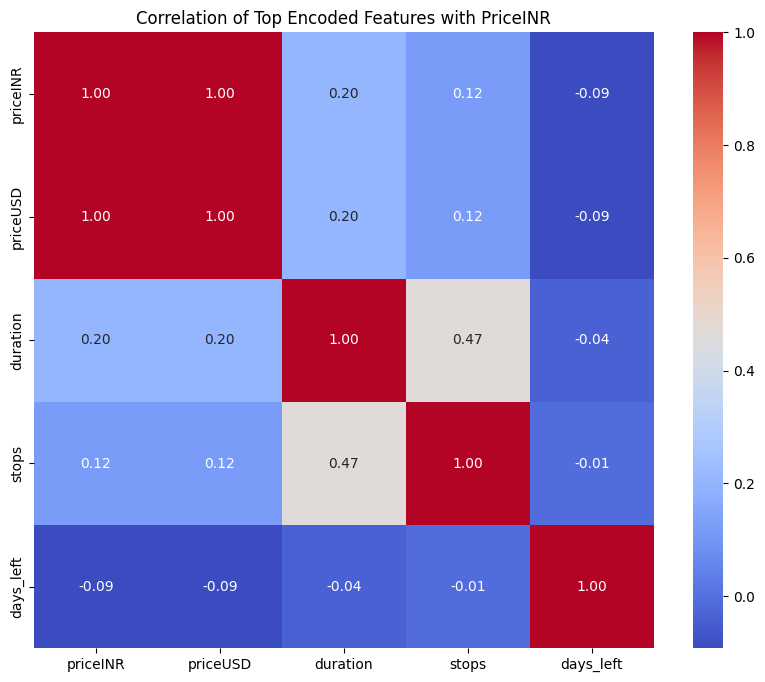

In [43]:
# Select only numeric columns for correlation calculation
numeric_data_encoded = data_encoded.select_dtypes(include=[np.number])

# Calculate correlations among numeric columns
correlations = numeric_data_encoded.corr()

# Now, extract correlations with the target variable 'priceINR'
target_correlations = correlations['priceINR'].sort_values(ascending=False)

# Optionally, focus on a subset of top correlated features for visualization
top_correlated_features = target_correlations.head(10).index

# Plotting the heatmap for top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data_encoded[top_correlated_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Top Encoded Features with PriceINR')
plt.show()

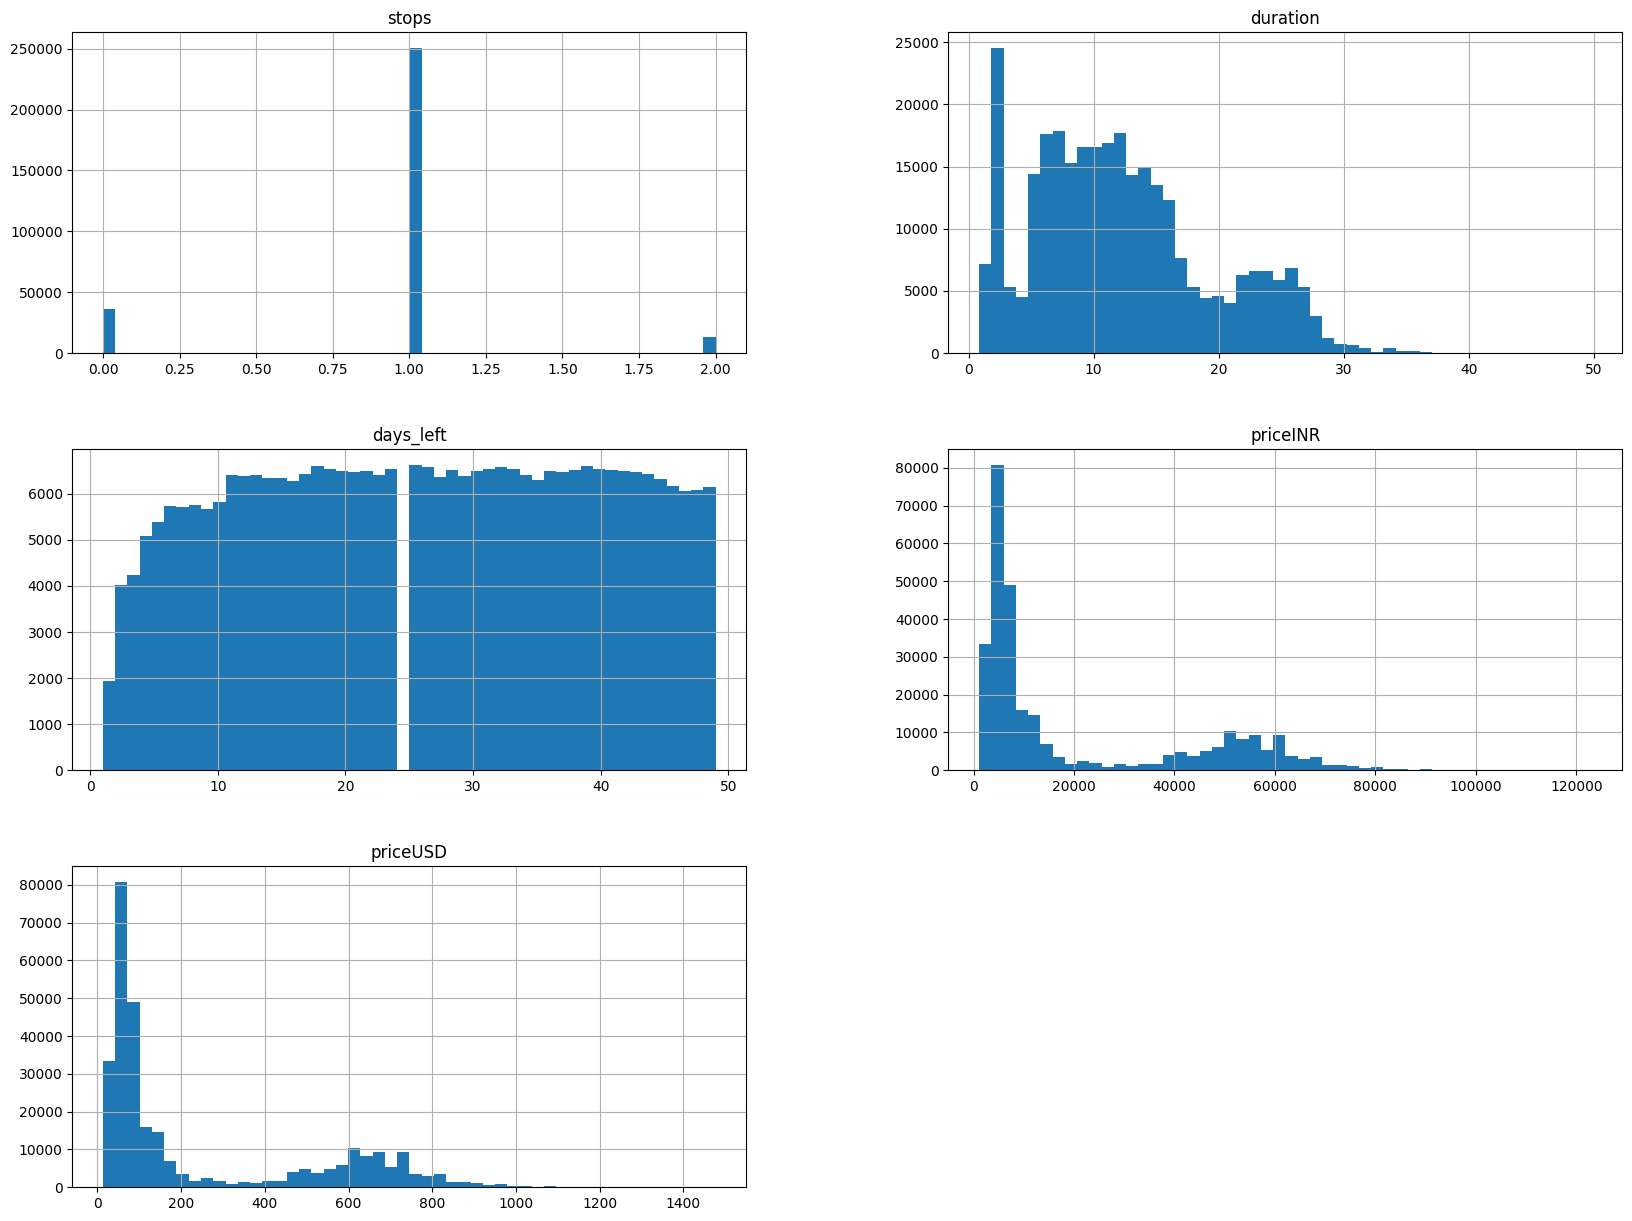

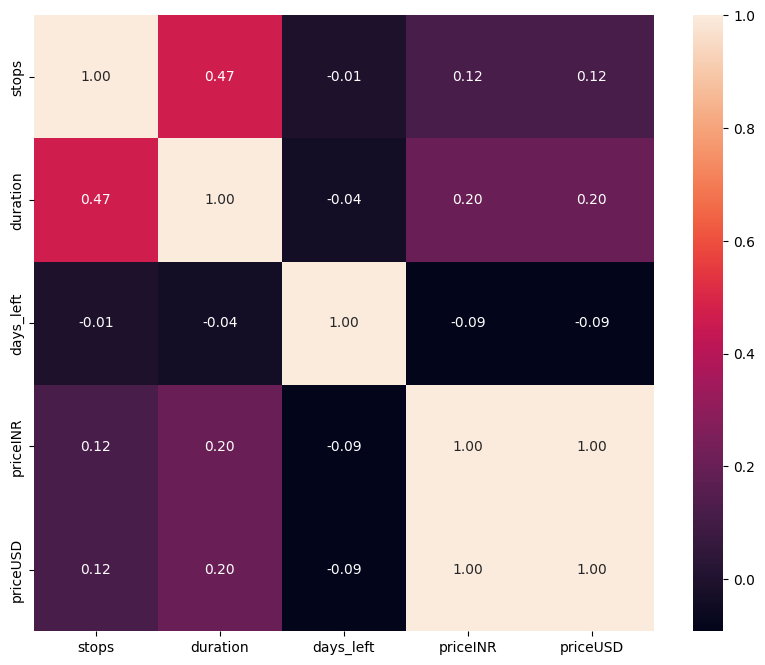

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
data.hist(bins=50, figsize=(20,15))
plt.show()

# Ensure only numeric columns are considered for correlation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()